## 1. Simulate 3D displacement time-series ##

In [1]:
## Simulate 3D displacement time-series

%matplotlib inline
import os
import numpy as np
from matplotlib import pyplot as plt
from mintpy.objects import timeseries, sensor
from mintpy.utils import readfile, writefile
from mintpy.simulation import simulation as sim
from mintpy.defaults.plot import *

work_dir = os.path.expanduser('~/Documents/Paper/2019_MintPy/Notebooks/phaseCorrection_order')
os.chdir(work_dir)
print('Go to directory: '+work_dir)

# reference timeseries file for temp/perp baselines
proj_dir = os.path.expanduser('~/insarlab/Galapagos/AlcedoSenDT128/mintpy')
ts_file         = os.path.join(proj_dir, 'timeseries.h5')
water_mask_file = os.path.join(proj_dir, 'waterMask.h5')
sensorName = sensor.project_name2sensor_name(ts_file)[0]

ts_obj = timeseries(ts_file)
ts_obj.open()
pbase = np.array(ts_obj.pbase)
tbase = np.array(ts_obj.tbase)
date_list = ts_obj.get_date_list()

num_date = len(date_list)
length = ts_obj.length
width = ts_obj.width

Go to directory: /Users/yunjunz/Documents/Paper/2019_MintPy/Notebooks/phaseCorrection_order
open timeseries file: timeseries.h5


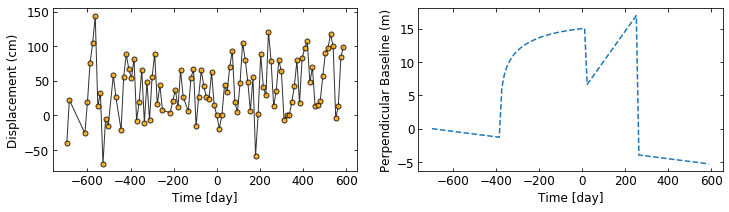

In [2]:
## 1D displacement - one pixel
ts_sim = sim.sim_variable_timeseries(tbase, display=False)

# plot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=[12, 3])
ax1.plot(tbase, pbase, '-ko', alpha=0.8, lw=1, ms=marker_size, mfc='orange')
ax2.plot(tbase, ts_sim * 100., '--')
for ax in [ax1, ax2]:
    ax.set_xlabel('Time [day]', fontsize=font_size)
    ax.tick_params(which='both', direction='in', labelsize=font_size, bottom=True, top=True, left=True, right=True)
ax1.set_ylabel('Displacement (cm)', fontsize=font_size)
ax2.set_ylabel('Perpendicular Baseline (m)',fontsize=font_size)
plt.show()

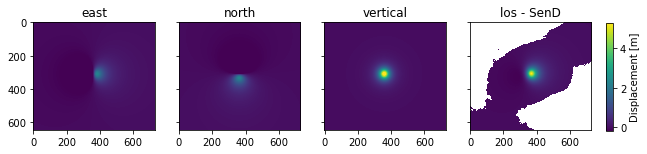

In [3]:
## 2D displacement - spatial pattern from deformation source (check_board / mogi)
water_mask = readfile.read(water_mask_file)[0]
pattern = 'mogi' # 'check_board', 'mogi'

if pattern == 'check_board':
    grid_step = 100     # pixel number
    unit_pattern = sim.check_board(water_mask, grid_step, display=True)

elif pattern == 'mogi':
    resolution = 60.
    source_geom = (360 * resolution,     # m
                   310 * resolution,     # m
                   2e3,                  # m
                   100e6)                # m^3
    unit_pattern = sim.mogi_deformation(water_mask,
                                        source_geom,
                                        resolution=resolution,
                                        display=True)

In [4]:
## 3D displacement - 1D * 2D
out_file = 'sim_displacement.h5'
if not os.path.isfile(out_file):
    ts_data = np.zeros((num_date, length, width), np.float32)
    for i in range(num_date):
        ts_data[i, :, :] = ts_sim[i] * unit_pattern
    ts_data[np.isnan(ts_data)] = 0.
    writefile.write(ts_data, out_file=out_file, ref_file=ts_file, compression='lzf')
    print('save simulated displacement to file', out_file)

create timeseries HDF5 file: sim_displacement.h5 with w mode
create dataset /timeseries of float32    in size of (98, 646, 729) with compression=lzf
create dataset /dates      of |S8        in size of (98,)
create dataset /bperp      of float32    in size of (98,)
finished writing to sim_displacement.h5
save simulated displacement to file sim_displacement.h5


run view.py in MintPy release version v1.1.2-93, release date 2019-07-23
input file is timeseries file: /Users/yunjunz/Documents/Paper/2019_MintPy/Notebooks/phaseCorrection_order/sim_displacement.h5 in float32 format
file size in y/x: (646, 729)
num of datasets in file sim_displacement.h5: 98
datasets to exclude (0):
[]
datasets to display (98):
['timeseries-20141213', 'timeseries-20141225', 'timeseries-20150307', 'timeseries-20150319', 'timeseries-20150331', 'timeseries-20150412', 'timeseries-20150424', 'timeseries-20150506', 'timeseries-20150518', 'timeseries-20150530', 'timeseries-20150611', 'timeseries-20150623', 'timeseries-20150717', 'timeseries-20150729', 'timeseries-20150822', 'timeseries-20150903', 'timeseries-20150915', 'timeseries-20150927', 'timeseries-20151009', 'timeseries-20151021', 'timeseries-20151102', 'timeseries-20151114', 'timeseries-20151126', 'timeseries-20151208', 'timeseries-20151220', 'timeseries-20160101', 'timeseries-20160113', 'timeseries-20160125', 'timese

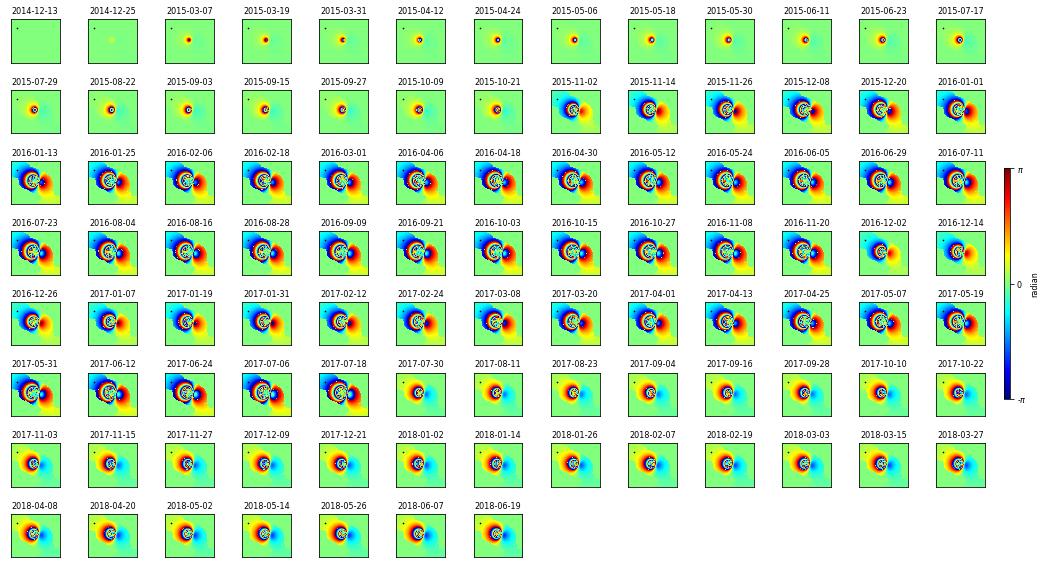

In [5]:
from mintpy import view
scp_args = ' {} --wrap '.format(out_file)
view.main(scp_args.split())